In [1]:
from ema_workbench import (ema_logging, RealParameter, IntegerParameter,
                           TimeSeriesOutcome, ScalarOutcome, Constant, MultiprocessingEvaluator, perform_experiments, save_results, load_results)

from integrated_model import IntegratedModel
from integrated_model import mean_over_replications
import numpy as np
import matplotlib.pyplot as plt
import mpld3
import operator
from ema_workbench.analysis import prim
from ema_workbench.analysis.plotting_util import VIOLIN, KDE
from ema_workbench.analysis.plotting import lines, envelopes
import pandas as pd

from ema_workbench.analysis.plotting import lines, envelopes
from ema_workbench.analysis.plotting_util import VIOLIN, KDE
from ema_workbench.analysis.pairs_plotting import pairs_lines, pairs_scatter, pairs_density
from ema_workbench.analysis import prim
from ema_workbench.util import load_results, ema_logging

# import mpld3
# import seaborn as sns
ema_logging.LOG_FORMAT = '[%(name)s/%(levelname)s/%(processName)s] %(message)s'
ema_logging.log_to_stderr(ema_logging.INFO)


C:\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:22: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:8: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
C:\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:23: ImportWarning: pysd connector not available
  warnings.warn("pysd connector not available", ImportWarning)
C:\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [2]:
ema_logging.LOG_FORMAT = '[%(name)s/%(levelname)s/%(processName)s] %(message)s'
ema_logging.log_to_stderr(ema_logging.INFO)

model = IntegratedModel('Test', wd='./model')  #AANPASSEN
model.replications = 50

#     #specify uncertainties


#specify uncertainties
# model.uncertainties = [RealParameter("energy_demand_growth_f",-0.03, 0.03),
#                             RealParameter("a",0,0.3),
#                             RealParameter("market_share_base_growth_f", -0.015, 0.015),
#                             IntegerParameter("u", 10,40),
#                             RealParameter("c",0,0.1),
#                             RealParameter("other_grey_share_growth_f", -0.03,0.03)
#                           ]

model.uncertainties = [RealParameter("energy_demand_growth_f",-0.006, 0.013),
                            RealParameter("a",0,0.2),
                            RealParameter("market_share_base_growth_f", -0.02, 0.02),
                            IntegerParameter("u", 0,39),
                            RealParameter("c",0.03,0.733),
                            RealParameter("other_grey_share_growth_f", -0.015,0.015)
                          ]
#specify outcomes 
model.outcomes = [TimeSeriesOutcome('area_capacity_current', function=mean_over_replications),    
                    TimeSeriesOutcome('area_capacity_unused_current', function=mean_over_replications),           
                    TimeSeriesOutcome('area_TP_current', function=mean_over_replications),                       
                    TimeSeriesOutcome('area_occupancy_current', function=mean_over_replications),                
                    TimeSeriesOutcome('area_denied_infra_cap_current', function=mean_over_replications),          
                    TimeSeriesOutcome('area_denied_cap_percentage_current', function=mean_over_replications),     
                    TimeSeriesOutcome('terminal_capacity_current', function=mean_over_replications),              
                    TimeSeriesOutcome('terminal_capacity_unused_current', function=mean_over_replications),       
                    TimeSeriesOutcome('terminal_TP_current', function=mean_over_replications),                    
                    TimeSeriesOutcome('terminal_occupancy_current', function = mean_over_replications),             
                    TimeSeriesOutcome('terminal_capacity_expanded_current', function=mean_over_replications),     
                    TimeSeriesOutcome('terminal_capacity_initial_current', function=mean_over_replications),      
                    TimeSeriesOutcome('terminal_denied_infra_cap_current', function=mean_over_replications),      
                    TimeSeriesOutcome('terminal_surface_current', function=mean_over_replications),               
                    TimeSeriesOutcome('TP_without_terminal_current', function=mean_over_replications),            
                    TimeSeriesOutcome('total_TP_rdam_current', function=mean_over_replications),                  
                    TimeSeriesOutcome('total_surface_terminals_current', function=mean_over_replications),          
                    TimeSeriesOutcome('business_case_terminal_current', function=mean_over_replications),         
                    TimeSeriesOutcome('business_value_pora_current', function=mean_over_replications),            
                    TimeSeriesOutcome('area_capacity_project', function=mean_over_replications),                  
                    TimeSeriesOutcome('area_capacity_unused_project', function=mean_over_replications),           
                    TimeSeriesOutcome('area_TP_project', function=mean_over_replications),                        
                    TimeSeriesOutcome('area_occupancy_project', function=mean_over_replications),                 
                    TimeSeriesOutcome('area_denied_infra_cap_project', function=mean_over_replications),          
                    TimeSeriesOutcome('area_denied_cap_percentage_project', function=mean_over_replications),     
                    TimeSeriesOutcome('terminal_capacity_project', function=mean_over_replications),              
                    TimeSeriesOutcome('terminal_capacity_unused_project', function=mean_over_replications),       
                    TimeSeriesOutcome('terminal_TP_project', function=mean_over_replications),                    
                    TimeSeriesOutcome('terminal_occupancy_project', function=mean_over_replications),             
                    TimeSeriesOutcome('terminal_capacity_expanded_project', function=mean_over_replications),     
                    TimeSeriesOutcome('terminal_capacity_initial_project', function=mean_over_replications),      
                    TimeSeriesOutcome('terminal_denied_infra_cap_project', function=mean_over_replications),      
                    TimeSeriesOutcome('terminal_surface_project', function=mean_over_replications),               
                    TimeSeriesOutcome('TP_without_terminal_project', function=mean_over_replications),            
                    TimeSeriesOutcome('total_TP_rdam_project', function=mean_over_replications),                  
                    TimeSeriesOutcome('total_surface_terminals_project', function=mean_over_replications),  
                    TimeSeriesOutcome('business_case_terminal_project', function=mean_over_replications),
                    TimeSeriesOutcome('business_value_pora_project', function=mean_over_replications),
                    TimeSeriesOutcome('coal_throughput_Rdam_project', function=mean_over_replications),
                    TimeSeriesOutcome('market_share_Rdam_project', function=mean_over_replications),
                    TimeSeriesOutcome('coal_throughput_Rdam_current', function=mean_over_replications),
                    TimeSeriesOutcome('market_share_Rdam_current', function=mean_over_replications),
                    ScalarOutcome('NPV', function=mean_over_replications)]



model.constants = [Constant('run_times', 40),
                  Constant('project_to_assess','Infrastructure'),
                  Constant('energy_demand_init', 240000000),
                  Constant('other_grey_share_init', 0.54),
                  Constant('green_share_init', 0.267),
                  Constant('market_share_init', 0.376)
                  ]



In [ ]:
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(1000)
save_results(results, r'ResultsEcosystem2509 rep 2 exp 100.5.tar.gz')

[EMA/INFO/MainProcess] pool started
[EMA/INFO/MainProcess] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[EMA/INFO/MainProcess] 100 cases completed
[EMA/INFO/MainProcess] 200 cases completed
[EMA/INFO/MainProcess] 300 cases completed
[EMA/INFO/MainProcess] 400 cases completed
[EMA/INFO/MainProcess] 500 cases completed


In [4]:
# results = load_results(r'ResultsEcosystem0809 - test coal test5.tar.gz')
results = load_results(r'ResultsEcosystem1109 rep 50 exp 1000.tar.gz')
experiments, outcomes = results

# DEFINE NUMBER OF RUN TIMES
run_times = 40
ranget = np.arange(run_times)
ranget_ax = np.arange(2017,2017+run_times)


# DEFINE UNIQUE OUTCOME NAMES
new_outcomes = {}
list_keys_to_delete = []
for key in outcomes:
    if isinstance(outcomes[key][1], np.float64):  # scalar outcomes don't need to be adjusted, like NPV
            new_outcomes[key] = outcomes[key]
            list_keys_to_delete.append(key)        
    if not isinstance(outcomes[key][1], np.float64):  # time series outcomes not of variable number, coal_throughput_Rdam_current
        if len(outcomes[key][1]) == run_times: # dict changed size during iteration, need to make aux. list of keys to delete
            new_outcomes[key] = outcomes[key]
            list_keys_to_delete.append(key)

for key in list_keys_to_delete:   # these outcomes ares transfered to new_outcomes already
    del outcomes[key]          
    
for key in outcomes:              # transfer outcomes from outcomes to new_outcomes
    variable = outcomes[key]
    for i in range(len(variable[1])): # define number of areas
        templist = []
        name = key +str(i)
        for j in range(len(variable)):  # define number of experiments
            templist.append(variable[j][i])
            new_outcomes[name] = templist

for key in new_outcomes:
    new_outcomes[key] = np.array(new_outcomes[key])            

results = experiments, new_outcomes

# DEFINE MEAN OCCUPANCY OF AREAS, over time
variable = 'area_occupancy_current'

mean_list = []
mean_list2 = []
mean_list3 = []
for e in range(len(new_outcomes[variable + str(1)])):
    mean_list2 = []
    for t in range(run_times):
        mean_list = []
        for a in range(7):
            name = variable +str(a)
            mean_list.append((new_outcomes[name][e][t]))
        mean_list2.append(np.mean(mean_list))
    mean_list3.append(mean_list2)

new_outcomes['mean_'+ variable] = np.array(mean_list3)
# print(new_outcomes['mean_occupancy'])

# DEFINE SUM CAPACITY OF AREAS, over time
variable = 'area_capacity_current'

sum_list = []
sum_list2 = []
sum_list3 = []
for e in range(len(new_outcomes[variable + str(1)])):
    sum_list2 = []
    for t in range(run_times):
        sum_list = []
        for a in range(7):
            name = variable +str(a)
            sum_list.append((new_outcomes[name][e][t]))
        sum_list2.append(np.sum(sum_list))
    sum_list3.append(sum_list2)

new_outcomes['sum_'+ variable] = np.array(sum_list3)

# DEFINE SUM DENIED INFRA CAP OF AREAS, over time
variable = 'area_denied_infra_cap_current'

sum_list = []
sum_list2 = []
sum_list3 = []
for e in range(len(new_outcomes[variable + str(1)])):
    sum_list2 = []
    for t in range(run_times):
        sum_list = []
        for a in range(7):
            name = variable +str(a)
            sum_list.append((new_outcomes[name][e][t]))
        sum_list2.append(np.sum(sum_list))
    sum_list3.append(sum_list2)

new_outcomes['sum_'+ variable] = np.array(sum_list3)


# DEFINE PERCENTAGE OF TP WITHOUT TERMINALS
percentage_TP_without_terminal_current = []
TP_without_terminal_current = new_outcomes['TP_without_terminal_current']
coal_throughput_Rdam_current = new_outcomes['coal_throughput_Rdam_current']
percentage_list = []

for exp in range(len(TP_without_terminal_current)):
    percentage_list = []
    for t in ranget:
        percentage = TP_without_terminal_current[exp][t]/coal_throughput_Rdam_current[exp][t]
        percentage_list.append(percentage)
    percentage_TP_without_terminal_current.append(percentage_list)
#     plt.plot(percentage_list)
# plt.show()

new_outcomes['percentage_TP_without_terminal_current'] = np.array(percentage_TP_without_terminal_current)


results = experiments, new_outcomes


# DEFINE VARIABLE DICTIONARY
titles_dict = {}
titles_dict['TP_without_terminal_current'] = 'Plausible range of coal throughput not able to go to Rotterdam'
titles_dict['coal_throughput_Rdam_current'] = 'Plausible range of coal throughput to Rotterdam'
titles_dict['mean_area_occupancy_current'] = 'Mean occupancy of all areas'
titles_dict['business_value_pora_current'] = 'Business value Port of Rotterdam Authority'
titles_dict['sum_area_denied_infra_cap_current'] = 'Total denied throughput'
titles_dict['sum_area_capacity_current'] = 'Total capacity of all terminals in the port area'

ylabel_dict = {}
ylabel_dict['TP_without_terminal_current'] = 'Coal throughput (ton)'
ylabel_dict['coal_throughput_Rdam_current'] = 'Coal throughput (ton)'
ylabel_dict['mean_area_occupancy_current'] = 'Occupancy (%)'
ylabel_dict['business_value_pora_current'] = 'Business value (€)'
ylabel_dict['sum_area_denied_infra_cap_current'] = 'Coal throughput (ton)'
ylabel_dict['sum_area_capacity_current'] = 'Capacity (ton)'


[EMA/INFO/MainProcess] results loaded succesfully from C:\Users\Amber van Oel\Documents\SEPAM\Thesis - ABM\amber 2.0\ResultsEcosystem1109 rep 50 exp 1000.tar.gz


In [ ]:
# test = {}
# test['test0'] = np.array([[1000,2000,3000],[4000,5000,6000],[7000,8000,9000],[7000,8000,9000]])
# test['test1'] = np.array([[1,2,3],[4,5,6],[7,8,9],[7,8,9]])
# test['test2'] = np.array([[10,20,30],[40,50,60],[70,80,90],[70,80,90]])
# test['test3'] = np.array([[100,200,300],[400,500,600],[700,800,900],[700,800,900]])
# print(test['test1'])

[EMA/INFO/MainProcess] NPV not shown because it is not time series data


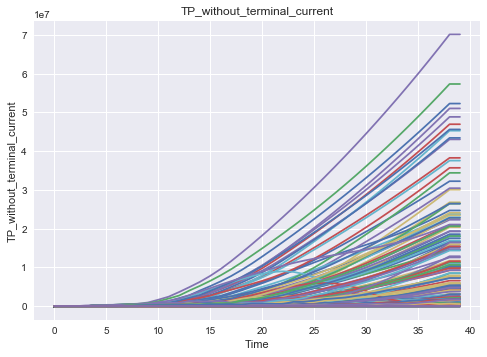

In [46]:
figure = lines(results,outcomes_to_show='TP_without_terminal_current')
plt.show()

[EMA/INFO/MainProcess] NPV not shown because it is not time series data


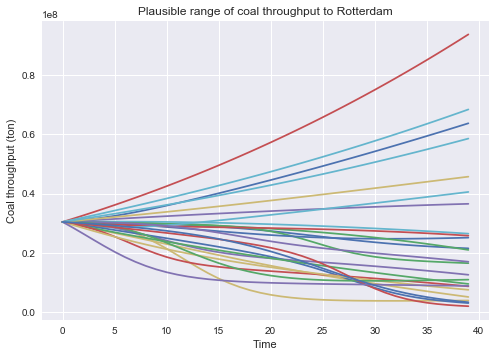

In [20]:
figure = lines(results,outcomes_to_show='coal_throughput_Rdam_current', titles=titles_dict, ylabels=ylabel_dict)
plt.show()

In [ ]:
figure = lines(results,outcomes_to_show='sum_area_capacity_current')
plt.show()

In [ ]:
figure = lines(results,outcomes_to_show='sum_area_denied_infra_cap_current')
plt.show()

In [ ]:
figure = lines(results,outcomes_to_show='mean_area_occupancy_current')
plt.show()

In [ ]:
# data1 = new_outcomes['area_occupancy_current3']
# data2 = new_outcomes['area_occupancy_project3']

variable = 'area_denied_infra_cap'

ylim = np.amax(outcomes[variable+'_current'])
ylim = int(round(ylim, (-1* (len(str(round(int(ylim)))))) + 1 ))

plt.close('all')
fig = plt.figure(figsize=(20,30))
fig.suptitle(variable)


x = 1
for j in range(7):
    data1 = new_outcomes[variable + '_current'+str(j)]
    ax = fig.add_subplot(7,2,x)
    ax.plot(np.mean(data1, axis=0), label = 'mean')
    ax.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
    ax.plot(np.percentile(data1, 25, axis=0), label='first quartile')
    ax.plot(np.percentile(data1, 75, axis=0), label='third quartile')
#     plt.ylim([0,ylim])
    plt.title('Area ' + str(j))
    x = x + 2

x = 2
for j in range(7):
    data2 = new_outcomes[variable + '_project'+str(j)]
    ax1 = fig.add_subplot(7,2,x)
    ax1.plot(np.mean(data2, axis=0), label = 'mean')
    ax1.fill_between(np.arange(0, data2.shape[1]),np.min(data2, axis=0), np.max(data2, axis=0), alpha=0.2)
    ax1.plot(np.percentile(data2, 25, axis=0), label='first quartile')
    ax1.plot(np.percentile(data2, 75, axis=0), label='third quartile')
#     plt.ylim([0,ylim])
    plt.title('Area ' + str(j))
    x = x + 2
plt.show()

In [ ]:
data1 = new_outcomes['area_TP_current4']
data2 = new_outcomes['area_TP_project4']

plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('area capacity - area4')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
ax.plot(np.percentile(data1, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1, 75, axis=0), label='third quartile')
plt.ylim([10000,6000000])
plt.title('current')


ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2.shape[1]),np.min(data2, axis=0), np.max(data2, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2, 75, axis=0), label='third quartile')
plt.ylim([10000,6000000])
plt.title('project')

plt.show()

In [ ]:
outcomes_for_graphs = new_outcomes    # make one dict without NPV, because NPV cannot be plotted
del outcomes_for_graphs['NPV']

#ONLY FOR AREAS, TP etc, NOT FOR TERMINALS

oois = outcomes_for_graphs.keys()

for ooi in oois:
#     print(ooi)
    data_to_sort_by = outcomes_for_graphs[ooi][:,-1]
    if not data_to_sort_by[0] == data_to_sort_by[1]:
        indices = np.argsort(data_to_sort_by)
        indices = indices[1:indices.shape[0]:10]  
        lines(results, outcomes_to_show=ooi, density=VIOLIN, 
              show_envelope=True, experiments_to_show=indices)
        plt.show()

# Visualisation of the uncertainty space

In [ ]:
plt.close('all')
variable = 'TP_without_terminal_current'

figure = lines(results,outcomes_to_show=variable, titles=titles_dict, ylabels=ylabel_dict)

data = new_outcomes[variable]
fig = plt.figure(figsize=(3.8,3))
ax = fig.add_subplot(111)
ax.plot(ranget_ax, np.median(data, axis=0), label = 'median')
ax.fill_between(ranget_ax, np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(ranget_ax, np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(ranget_ax, np.percentile(data, 75, axis=0), label='third quartile')
plt.ylabel(ylabel_dict[variable], fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.title(titles_dict[variable], fontsize=7)
ax.legend(fontsize=8)
plt.show()

fig = plt.figure(figsize=(3.8,3))
data = new_outcomes[variable]
list2 = []
for t in ranget:
    list1 = []
    for j in range(len(data)):
        list1.append(data[j][t])
    list2.append(list1)
plt.boxplot(list2)
# plt.ylim([65,75])
plt.ylabel(ylabel_dict[variable], fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.title(titles_dict[variable], fontsize=7)
plt.xticks(ranget, ranget_ax)
# plt.ylim([0,1000000])
plt.show()

variable_to_show = new_outcomes[variable][:,-1]
indices = np.argsort(variable_to_show)
indices = indices[1:indices.shape[0]:100]  
figure = lines(results, outcomes_to_show=variable, density=VIOLIN, 
      show_envelope=True, experiments_to_show=indices, titles=titles_dict, ylabels=ylabel_dict)
plt.show()

In [ ]:
plt.close('all')
variable = 'coal_throughput_Rdam_current'

figure = lines(results,outcomes_to_show=variable, titles=titles_dict, ylabels=ylabel_dict)

data = new_outcomes[variable]
fig = plt.figure(figsize=(3.8,3))
ax = fig.add_subplot(111)
ax.plot(ranget_ax, np.median(data, axis=0), label = 'median')
ax.fill_between(ranget_ax, np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(ranget_ax, np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(ranget_ax, np.percentile(data, 75, axis=0), label='third quartile')
plt.ylabel(ylabel_dict[variable], fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.title(titles_dict[variable], fontsize=7)
ax.legend(fontsize=8)
plt.show()

fig = plt.figure(figsize=(3.8,3))
data = new_outcomes[variable]
list2 = []
for t in ranget:
    list1 = []
    for j in range(len(data)):
        list1.append(data[j][t])
    list2.append(list1)
plt.boxplot(list2)
# plt.ylim([65,75])
plt.ylabel(ylabel_dict[variable], fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.title(titles_dict[variable], fontsize=7)
plt.xticks(ranget, ranget_ax)
# plt.ylim([0,1000000])
plt.show()

variable_to_show = new_outcomes[variable][:,-1]
indices = np.argsort(variable_to_show)
indices = indices[1:indices.shape[0]:100]  
figure = lines(results, outcomes_to_show=variable, density=VIOLIN, 
      show_envelope=True, experiments_to_show=indices, titles=titles_dict, ylabels=ylabel_dict)
plt.show()

In [ ]:
plt.close('all')
variable = 'mean_area_occupancy_current'

figure = lines(results,outcomes_to_show=variable, titles=titles_dict, ylabels=ylabel_dict)

data = new_outcomes[variable]
fig = plt.figure(figsize=(3.8,3))
ax = fig.add_subplot(111)
ax.plot(ranget_ax, np.median(data, axis=0), label = 'median')
ax.fill_between(ranget_ax, np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(ranget_ax, np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(ranget_ax, np.percentile(data, 75, axis=0), label='third quartile')
plt.ylabel(ylabel_dict[variable], fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.title(titles_dict[variable], fontsize=7)
ax.legend(fontsize=8)
plt.show()

fig = plt.figure(figsize=(3.8,3))
data = new_outcomes[variable]
list2 = []
for t in ranget:
    list1 = []
    for j in range(len(data)):
        list1.append(data[j][t])
    list2.append(list1)
plt.boxplot(list2)
# plt.ylim([65,75])
plt.ylabel(ylabel_dict[variable], fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.title(titles_dict[variable], fontsize=7)
plt.xticks(ranget, ranget_ax)
# plt.ylim([0,1000000])
plt.show()


variable_to_show = new_outcomes[variable][:,-1]
indices = np.argsort(variable_to_show)
indices = indices[1:indices.shape[0]:20]  
lines(results, outcomes_to_show=variable, density=VIOLIN, 
      show_envelope=True, experiments_to_show=indices, titles=titles_dict, ylabels=ylabel_dict)
fig = plt.figure(figsize=(3.8,3))
plt.show()

[EMA/INFO/MainProcess] NPV not shown because it is not time series data
[EMA/INFO/MainProcess] mean_terminal_occupancy_project31 not shown because it is not time series data


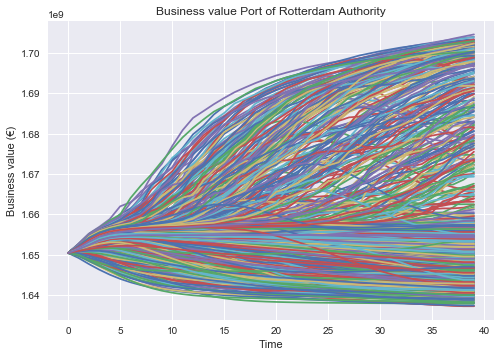

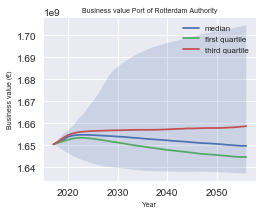

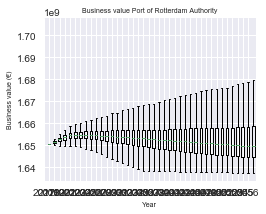

[EMA/INFO/MainProcess] NPV not shown because it is not time series data
[EMA/INFO/MainProcess] mean_terminal_occupancy_project31 not shown because it is not time series data


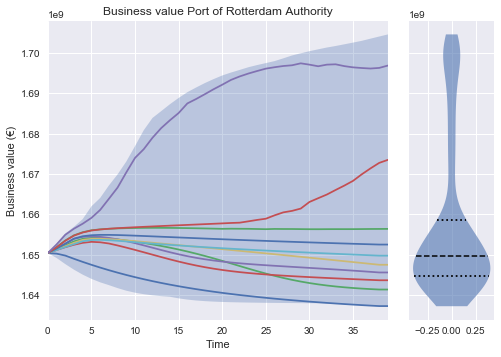

In [74]:
plt.close('all')
variable = 'business_value_pora_current'

figure = lines(results,outcomes_to_show=variable, titles=titles_dict, ylabels=ylabel_dict)


data = new_outcomes[variable]
fig = plt.figure(figsize=(3.8,3))
ax = fig.add_subplot(111)
ax.plot(ranget_ax, np.median(data, axis=0), label = 'median')
ax.fill_between(ranget_ax, np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(ranget_ax, np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(ranget_ax, np.percentile(data, 75, axis=0), label='third quartile')
plt.ylabel(ylabel_dict[variable], fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.title(titles_dict[variable], fontsize=7)
ax.legend(fontsize=8)
plt.show()

fig = plt.figure(figsize=(3.8,3))
data = new_outcomes[variable]
list2 = []
for t in ranget:
    list1 = []
    for j in range(len(data)):
        list1.append(data[j][t])
    list2.append(list1)
plt.boxplot(list2)
# plt.ylim([65,75])
plt.ylabel(ylabel_dict[variable], fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.title(titles_dict[variable], fontsize=7)
plt.xticks(ranget, ranget_ax)
# plt.ylim([0,1000000])
plt.show()


variable_to_show = new_outcomes[variable][:,-1]
indices = np.argsort(variable_to_show)
indices = indices[1:indices.shape[0]:100]  
lines(results, outcomes_to_show=variable, density=VIOLIN, 
      show_envelope=True, experiments_to_show=indices, titles=titles_dict, ylabels=ylabel_dict)
fig = plt.figure(figsize=(3.8,3))
plt.show()

In [ ]:
plt.close('all')

figure = lines(results,outcomes_to_show=variable, titles=titles_dict, ylabels=ylabel_dict)


variable = 'sum_area_capacity_current'
data = new_outcomes[variable]
fig = plt.figure(figsize=(3.8,3))
ax = fig.add_subplot(111)
ax.plot(ranget_ax, np.median(data, axis=0), label = 'median')
ax.fill_between(ranget_ax, np.min(data, axis=0), np.max(data, axis=0), alpha=0.2)
ax.plot(ranget_ax, np.percentile(data, 25, axis=0), label='first quartile')
ax.plot(ranget_ax, np.percentile(data, 75, axis=0), label='third quartile')
plt.ylabel(ylabel_dict[variable], fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.title(titles_dict[variable], fontsize=7)
ax.legend(fontsize=8)
plt.show()

fig = plt.figure(figsize=(3.8,3))
data = new_outcomes[variable]
list2 = []
for t in ranget:
    list1 = []
    for j in range(len(data)):
        list1.append(data[j][t])
    list2.append(list1)
plt.boxplot(list2)
# plt.ylim([65,75])
plt.ylabel(ylabel_dict[variable], fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.title(titles_dict[variable], fontsize=7)
plt.xticks(ranget, ranget_ax)
# plt.ylim([0,1000000])
plt.show()


variable_to_show = new_outcomes[variable][:,-1]
indices = np.argsort(variable_to_show)
indices = indices[1:indices.shape[0]:100]  
lines(results, outcomes_to_show=variable, density=VIOLIN, 
      show_envelope=True, experiments_to_show=indices, titles=titles_dict, ylabels=ylabel_dict)
fig = plt.figure(figsize=(3.8,3))
plt.show()

# Correlation between outcomes

In [ ]:
plt.close('all')
variable1 = 'coal_throughput_Rdam_current'
variable2 = 'business_value_pora_current'

x1 = new_outcomes[variable1]
x2 = new_outcomes[variable2]
JG1 = sns.jointplot(x1,x2, kind="kde", size=5)
JG1.set_axis_labels(titles_dict[variable1], titles_dict[variable2])
plt.show()

In [ ]:
plt.close('all')
variable1 = 'mean_area_occupancy_current'
variable2 = 'business_value_pora_current'

x1 = new_outcomes[variable1]
x2 = new_outcomes[variable2]
JG1 = sns.jointplot(x1,x2, kind="kde", size=5)
JG1.set_axis_labels(titles_dict[variable1], titles_dict[variable2])
plt.show()

In [ ]:
plt.close('all')
variable1 = 'sum_area_denied_infra_cap_current'
variable2 = 'business_value_pora_current'

x1 = new_outcomes[variable1]
x2 = new_outcomes[variable2]
JG1 = sns.jointplot(x1,x2, kind="kde", size=5)
JG1.set_axis_labels(titles_dict[variable1], titles_dict[variable2])
plt.show()

In [ ]:
plt.close('all')
variable1 = 'coal_throughput_Rdam_current'
variable2 = 'TP_without_terminal_current'

x1 = new_outcomes[variable1]
x2 = new_outcomes[variable2]
JG1 = sns.jointplot(x1,x2, kind="kde", size=5)
JG1.set_axis_labels(titles_dict[variable1], titles_dict[variable2])
plt.show()

# Scenario discovery

# CREATE VERIABLES OF TOTAL VARIANCE

In [ ]:
variable = 'total_variation_mean_area_occupancy_current'
outcome = new_outcomes[variable]
j = 54
sum_i = 0
total_variation_i = 0
abs_growth_i = abs(outcome[j][0] - outcome[j][39])
range_i = abs(np.max(outcome[j]) - np.min(outcome[j]))
for i in range(len(outcome[j])-1):
    var = abs(outcome[j][i+1] - outcome[j][i])
    sum_i = sum_i + var
total_variation_i = sum_i / abs_growth_i
plt.plot(total_variation_i)
plt.title('Mean occupancy of all areas - path 1')
plt.ylabel('Occupancy')
plt.xlabel('time')
plt.show()

In [ ]:
# CREATE VERIABLE OF TOTAL VARIATION, by including plots it can be checked if they are monotonous or not
variable = 'area_occupancy_current2'

outcome = new_outcomes[variable]
total_variation = []
total_range = []
x = 0
for exp in range(len(outcome)):
    sum_exp = 0
    total_variation_exp = 0
    abs_growth_exp = abs(outcome[exp][0] - outcome[exp][39])
    range_exp = abs(np.max(outcome[exp]) - np.min(outcome[exp]))
    
    for t in range(len(outcome[exp])-1):
        var = abs(outcome[exp][t+1] - outcome[exp][t])
        sum_exp = sum_exp + var
    total_variation_exp = sum_exp / abs_growth_exp
    total_variation.append(total_variation_exp)
    total_range.append(range_exp)
# print(len(total_variation))
# new_outcomes['total_variation_' + variable] = np.array(total_variation)
# new_outcomes['total_range_' + variable] = np.array(total_range)
#     if total_variation_exp >=1.1 and range_exp >=15:
#         x = x + 1
#         plt.plot(outcome[exp])

#         plt.show()

# print(x)

In [ ]:
# CREATE VERIABLE OF TOTAL VARIANCE, by including plots it can be checked if they are monotonous or not
variable = 'mean_area_occupancy_current'

outcome = new_outcomes[variable]
total_variation = []
total_range = []
x = 0
for exp in range(len(outcome)):
    sum_exp = 0
    total_variation_exp = 0
    abs_growth_exp = abs(outcome[exp][0] - outcome[exp][39])
    range_exp = abs(np.max(outcome[exp]) - np.min(outcome[exp]))
    
    for t in range(len(outcome[exp])-1):
        var = abs(outcome[exp][t+1] - outcome[exp][t])
        sum_exp = sum_exp + var
    total_variation_exp = sum_exp / abs_growth_exp
    total_variation.append(total_variation_exp)
    total_range.append(range_exp)
new_outcomes['total_variation_' + variable] = np.array(total_variation)
new_outcomes['total_range_' + variable] = np.array(total_range)

In [ ]:
# CREATE VERIABLE OF TOTAL VARIANCE, by including plots it can be checked if they are monotonous or not
variable = 'coal_throughput_Rdam_current'
outcome = new_outcomes[variable]
total_variation = []
total_range = []
x = 0
for j in range(len(outcome)):
    sum_i = 0
    total_variation_i = 0
    abs_growth_i = abs(outcome[j][0] - outcome[j][39])
    range_i = abs(np.max(outcome[j]) - np.min(outcome[j]))
    for i in range(len(outcome[j])-1):
        var = abs(outcome[j][i+1] - outcome[j][i])
        sum_i = sum_i + var
    total_variation_i = sum_i / abs_growth_i
    total_variation.append(total_variation_i)
    total_range.append(range_i)
new_outcomes['total_variation_' + variable] = np.array(total_variation)
new_outcomes['total_range_' + variable] = np.array(total_variation)

In [ ]:
# CREATE VERIABLE OF TOTAL VARIANCE, by including plots it can be checked if they are monotonous or not
variable = 'sum_area_capacity_current'
outcome = new_outcomes[variable]
total_growth = []

x = 0
for j in range(len(outcome)):
    sum_i = 0
    total_variation_i = 0
    growth_i = outcome[j][39] - outcome[j][0]
    total_growth.append(growth_i)
new_outcomes['total_capacity_growth'] = np.array(total_growth)

# PRIM variation area occupancy 2

In [ ]:
# area_occupancy_current2
def classify(new_outcomes):
    variable1 = 'total_variation_area_occupancy_current2'
    variable2 = 'total_range_area_occupancy_current2'
    variable3 = 'area_occupancy_current2'
    
    outcome1 = new_outcomes[variable1]
    outcome2 = new_outcomes[variable2]
    outcome3 = new_outcomes[variable3]
    
    outcome1_1 = outcome3[:,1]
    outcome1_5 = outcome3[:,5]
    
    logical1 = outcome1 >= 1.2
    logical2 = outcome2 >= 15
    logical3 = outcome1_1 <= outcome1_5

    classes = np.zeros(outcome1.shape[0])
    classes[logical1 & logical2 & logical3] = 1
    return classes

x = experiments
y = classify(new_outcomes)

prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.7)
box1 = prim_obj.find_box()

box1.show_tradeoff()
plt.show()
box1.show_ppt()
plt.show()
box1.inspect()
box1.inspect(style='graph')
plt.show()


In [ ]:
box1.inspect(48,style='graph')
plt.show()

In [ ]:
box1.inspect(31,style='graph')
plt.show()

# PRIM NPV INFRA PROJECT

In [ ]:
print(new_outcomes['NPV'])

In [ ]:
def classify(new_outcomes):
    variable1 = 'NPV'

    outcome1 = new_outcomes[variable1]
    
    logical1 = outcome1 > 0
    
    classes = np.zeros(outcome1.shape[0])
    classes[logical1] = 1
    return classes

x = experiments
y = classify(new_outcomes)

prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.5)
box1 = prim_obj.find_box()

box1.show_tradeoff()
plt.show()
box1.show_ppt()
plt.show()
box1.inspect()
box1.inspect(style='graph')
plt.show()


# PRIM COAL TP

In [ ]:
def classify(new_outcomes):
    variable1 = 'total_variation_coal_throughput_Rdam_current'
    variable2 = 'total_range_coal_throughput_Rdam_current'
    
    outcome1 = new_outcomes[variable1]
    outcome2 = new_outcomes[variable2]
    
    logical1 = outcome1 >= 1.05
#     logical2 = outcome2 >= 20

    classes = np.zeros(outcome1.shape[0])
    classes[logical1] = 1
    return classes

x = experiments
y = classify(new_outcomes)

prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.5)
box1 = prim_obj.find_box()

box1.show_tradeoff()
plt.show()
box1.show_ppt()
plt.show()
box1.inspect()
box1.inspect(style='graph')
plt.show()


In [ ]:
box1.inspect(8,style='graph')
plt.show()

# PRIM TP without terminal percentage

In [ ]:
data1 = new_outcomes['percentage_TP_without_terminal_current']

plt.plot(np.mean(data1, axis=0), label = 'mean')
plt.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
plt.plot(np.percentile(data1, 25, axis=0), label='first quartile')
plt.plot(np.percentile(data1, 75, axis=0), label='third quartile')

plt.title('current')

plt.show()

def classify(new_outcomes):
    variable1 = 'percentage_TP_without_terminal_current'
    
    outcome = new_outcomes[variable1]
    
#     outcome_10 = outcome[:,10]
    outcome_20 = outcome[:,25]
    outcome_30 = outcome[:,30]
    outcome_39 = outcome[:,39]    
    
#     logical1 = outcome_10 >= 0.025
    logical2 = outcome_20 >= 0.025
    logical3 = outcome_30 >= 0.025 
    logical4 = outcome_39 >= 0.025
    

    classes = np.zeros(outcome.shape[0])
    classes[logical2 & logical3 & logical4] = 1
    return classes

x = experiments
y = classify(new_outcomes)

prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.5)
box1 = prim_obj.find_box()

box1.show_tradeoff()
plt.show()
box1.show_ppt()
plt.show()
box1.inspect()
box1.inspect(style='graph')
plt.show()


# PRIM terminal assessment

In [36]:
# create new outcomes, to show only the results from the year that the terminal is built
data1 = new_outcomes['terminal_occupancy_project31']
data1_list = []
for i in range(len(data1)):
    data1_list.append(data1[i][8:])
data1_list = np.array(data1_list)


outcomes2 = {}
outcomes2['occupancy'] = data1_list

results2 = experiments, outcomes2

In [35]:
data1 = new_outcomes['business_case_terminal_project31']
data1_list = []
for i in range(len(data1)):
    data1_list.append(data1[i][8:])
data1_list = np.array(data1_list)


outcomes2 = {}
outcomes2['business_case'] = data1_list

results2 = experiments, outcomes2

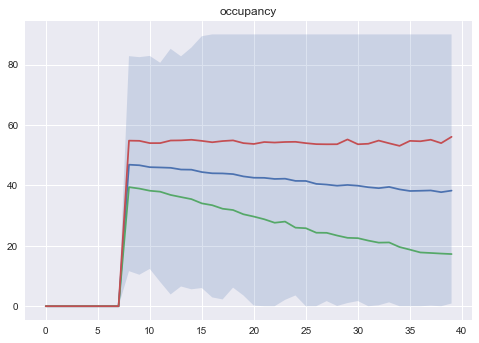

In [7]:
data1_list = new_outcomes['terminal_occupancy_project31']
plt.plot(np.mean(data1_list, axis=0), label = 'mean')
plt.fill_between(np.arange(0, data1_list.shape[1]),np.min(data1_list, axis=0), np.max(data1_list, axis=0), alpha=0.2)
plt.plot(np.percentile(data1_list, 25, axis=0), label='first quartile')
plt.plot(np.percentile(data1_list, 75, axis=0), label='third quartile')
# plt.ylim([10000,100000])
plt.title('occupancy')
plt.legend
plt.show()


In [47]:
# CREATE VERIABLE OF TOTAL VARIANCE, by including plots it can be checked if they are monotonous or not
variable = 'occupancy'
outcome = outcomes2[variable]
total_variation = []
total_range = []
x = 0
for j in range(len(outcome)):
    sum_i = 0
    total_variation_i = 0
    abs_growth_i = abs(outcome[j][0] - outcome[j][31])
    range_i = abs(np.max(outcome[j]) - np.min(outcome[j]))
    for i in range(len(outcome[j])-1):
        var = abs(outcome[j][i+1] - outcome[j][i])
        sum_i = sum_i + var
    total_variation_i = sum_i / abs_growth_i
    total_variation.append(total_variation_i)
    total_range.append(range_i)
#     if total_variation_i > 10 and range_i > 20:
#         plt.plot(outcome[j])
#         plt.show()
# new_outcomes['total_variation_' + variable] = np.array(total_variation)
# new_outcomes['total_range_' + variable] = np.array(total_variation)

[EMA/WARNING/MainProcess] key error in do_ylabels, no ylabel provided for `data1_list`
[EMA/WARNING/MainProcess] key error in do_titles, no title provided for `data1_list`


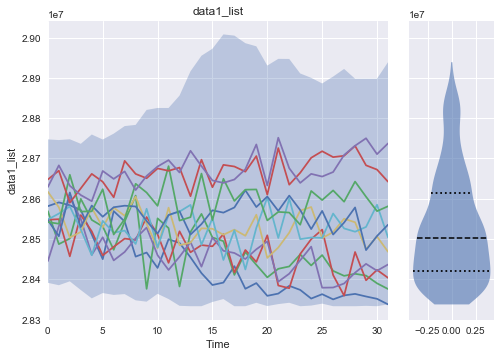

In [20]:
variable_to_show = outcomes2['data1_list'][:,-1]
indices = np.argsort(variable_to_show)
indices = indices[1:indices.shape[0]:100]  
lines(results2, outcomes_to_show='data1_list', density=VIOLIN, 
      show_envelope=True, experiments_to_show=indices, titles=titles_dict, ylabels=ylabel_dict)
fig = plt.figure(figsize=(3.8,3))
plt.show()

[EMA/WARNING/MainProcess] key error in do_ylabels, no ylabel provided for `data1_list`
[EMA/WARNING/MainProcess] key error in do_titles, no title provided for `data1_list`


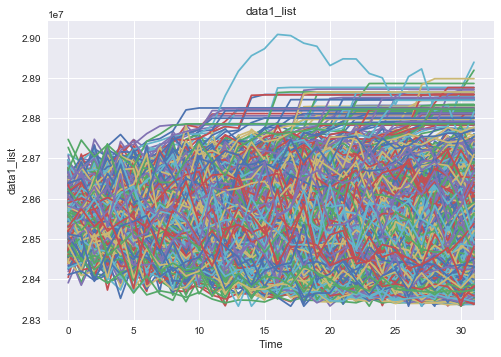

In [15]:
figure = lines(results2,outcomes_to_show='data1_list', titles=titles_dict, ylabels=ylabel_dict)
plt.show()

In [61]:
variable = new_outcomes['terminal_occupancy_project31']

mean_list = []
mean_list2 = []
mean_list3 = []
for e in range(len(variable)):
    mean_list.append(np.mean(variable[e]))

new_outcomes['mean_terminal_occupancy_project31'] = np.array(mean_list)

In [67]:
# NOT INTERESTING

# def classify(new_outcomes):
    
#     mean_terminal_occupancy = new_outcomes['mean_terminal_occupancy_project31']
    
#     logical1 = mean_terminal_occupancy > 50
#     classes = np.zeros(mean_terminal_occupancy.shape[0])
#     classes[ logical1] = 1
#     return classes

# x = experiments
# y = classify(new_outcomes)

# prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.5)
# box1 = prim_obj.find_box()

# box1.show_tradeoff()
# plt.show()
# box1.show_ppt()
# plt.show()
# box1.inspect()
# box1.inspect(style='graph')
# plt.show()
    

[EMA/INFO/MainProcess] 1000 points remaining, containing 198 cases of interest


198.0
198.0


[EMA/INFO/MainProcess] mean: 0.9682539682539683, mass: 0.063, coverage: 0.30808080808080807, density: 0.9682539682539683 restricted_dimensions: 5


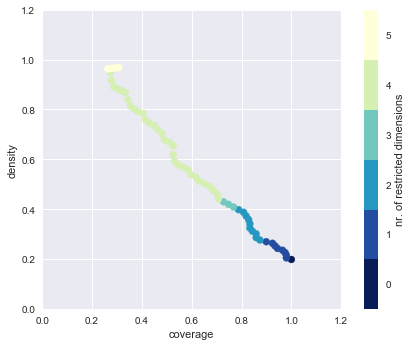

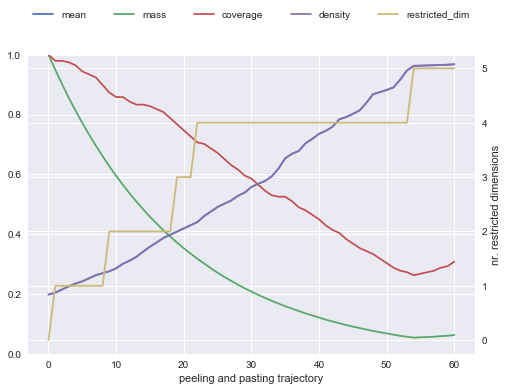

coverage    0.308081
density     0.968254
mass           0.063
mean        0.968254
res dim            5
Name: 60, dtype: object

                              box 60                        
                                 min       max     qp values
market_share_base_growth_f  0.003586  0.019962  6.223333e-13
c                           0.030147  0.294797  4.334974e-12
other_grey_share_growth_f  -0.014681 -0.000346  3.343048e-10
energy_demand_growth_f     -0.000681  0.012996  3.599592e-03
a                           0.004333  0.199870  4.285611e-01



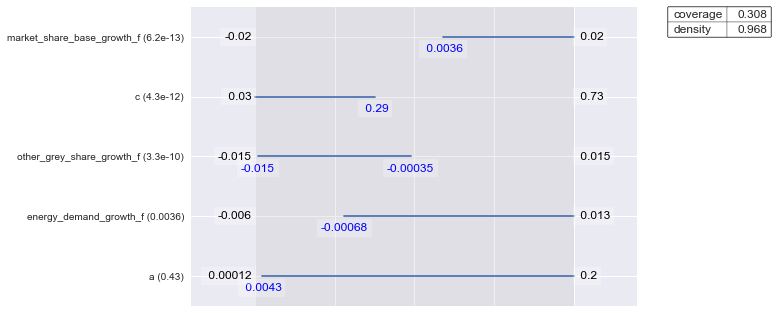

In [71]:
def classify(new_outcomes):

    area_TP_current = new_outcomes['area_TP_current4']
    area_TP_project = new_outcomes['area_TP_project4']

    TP_current = new_outcomes['total_TP_rdam_current']
    TP_project = new_outcomes['total_TP_rdam_project']
    
    terminal_occupancy = new_outcomes['terminal_occupancy_project31']
    
    # terminal is built in 2025, therefore start at t=15 to measure
    area_TP_current_15 = area_TP_current[:,15]
    area_TP_current_30 = area_TP_current[:,30]
    area_TP_current_39 = area_TP_current[:,39]    
    
    area_TP_project_15 = area_TP_project[:,15]
    area_TP_project_30 = area_TP_project[:,30]
    area_TP_project_39 = area_TP_project[:,39]

    TP_current_15 = TP_current[:,15]
    TP_current_30 = TP_current[:,30]
    TP_current_39 = TP_current[:,39]    
    
    TP_project_15 = TP_project[:,15]
    TP_project_30 = TP_project[:,30]
    TP_project_39 = TP_project[:,39]
    
    terminal_occupancy15 = terminal_occupancy[:,15]
    terminal_occupancy30 = terminal_occupancy[:,30]
    terminal_occupancy39 = terminal_occupancy[:,39]
    

    logical1 = (area_TP_project_15 > area_TP_current_15) & (area_TP_project_30 > area_TP_current_30) & (area_TP_project_39 > area_TP_current_39)
    logical2 = (TP_current_15 < TP_project_15) & (TP_current_30 < TP_project_30) & (TP_current_39 < TP_project_39) 
    logical3 = (terminal_occupancy15 > 50) & (terminal_occupancy30 > 50) & (terminal_occupancy39 > 50)
 
    classes = np.zeros(area_TP_project_15.shape[0])
    classes[logical1 & logical2 & logical3] = 1
    return classes

x = experiments
y = classify(new_outcomes)

prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.5)
box1 = prim_obj.find_box()

box1.show_tradeoff()
plt.show()
box1.show_ppt()
plt.show()
box1.inspect()
box1.inspect(style='graph')
plt.show()


# AREA PRIM OCCUPANCY - MONOTONOUS CHECK

In [ ]:
def classify(new_outcomes):
    variable1 = 'total_variation_mean_area_occupancy_current'
    variable2 = 'total_range_mean_area_occupancy_current'
#     variable3 = 'total_capacity_growth'
    
    outcome1 = new_outcomes[variable1]
    outcome2 = new_outcomes[variable2]
    
    logical1 = outcome1 >= 1.01
    logical2 = outcome2 >= 20
    
#     logical3 = outcome2 <= 200

    classes = np.zeros(outcome1.shape[0])
    classes[ logical1 & logical2] = 1
    return classes

x = experiments
y = classify(new_outcomes)

prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.5)
box1 = prim_obj.find_box()

box1.show_tradeoff()
plt.show()
box1.show_ppt()
plt.show()
box1.inspect()
box1.inspect(style='graph')
plt.show()


In [ ]:
box1.inspect(20,style='graph')
plt.show()

In [ ]:
box1.inspect(8,style='graph')
plt.show()

# PRIM OCCUPANCY - scenario development

In [ ]:
def classify(new_outcomes):
    variable = 'coal_throughput_Rdam_current'
    outcome = new_outcomes[variable]
    
    outcome_1 = outcome[:,1]
    outcome_2 = outcome[:,2]

    outcome_38 = outcome[:,38]
    outcome_39 = outcome[:,39]
    
    
    logical1 = (outcome_1 > outcome_2 ) (outcome_38 < outcome_39) 
    logical2 = (outcome_1 < outcome_2) & (outcome_38 > outcome_39) 
    
    logical2

    classes = np.zeros(outcome.shape[0])
    classes[logical1 | logical2] = 1
    return classes

x = experiments
y = classify(new_outcomes)

prim_obj = prim.MultiBoxesPrim(x,y, threshold=0.5)
box1 = prim_obj.find_box()

box1.show_tradeoff()
plt.show()
box1.show_ppt()
plt.show()
box1.inspect()
box1.inspect(style='graph')
plt.show()


# EXAMPLE OCCUPANCY VARIATION

In [ ]:
sum_i = 0
total_variation_i = 0
j = 152
abs_growth_i = abs(outcome[j][0] - outcome[j][39])
range_i = abs(np.max(outcome[j]) - np.min(outcome[j]))
for i in range(len(outcome[j])-1):
    var = abs(outcome[j][i+1] - outcome[j][i])
    sum_i = sum_i + var
total_variation_i = sum_i / abs_growth_i
print(sum_i)
print(abs_growth_i)
print(total_variation_i)
print(range_i)
plt.plot(outcome[j])
plt.title('Mean occupancy of all areas - path 1')
plt.ylabel('Occupancy')
plt.xlabel('time')
plt.show()

# In/out box example

In [ ]:
box1.select(16)

from ema_workbench.analysis.plotting_util import BOXPLOT

indices = box1.yi

all_indices = np.arange(experiments.shape[0])
logical = np.ones((all_indices.shape[0],), dtype=np.bool)
logical[indices] = 0
out_box = all_indices[logical]

gs = {}
gs['in box'] = indices
gs['out box'] = out_box
# gs['all'] = all_indices

envelopes(results, outcomes_to_show=['mean_area_occupancy_current'], group_by='index', grouping_specifiers=gs, fill=True, density=BOXPLOT)
plt.show()

# Model use (assesment of new terminal project)

In [ ]:
plt.close('all')
variable = 'area_occupancy_project4'

variable_to_show = new_outcomes[variable][:,-1]
indices = np.argsort(variable_to_show)
indices = indices[1:indices.shape[0]:50]  
figure = lines(results, outcomes_to_show=variable, density=VIOLIN, 
      show_envelope=True, experiments_to_show=indices, titles='terminal_occupancy_project31', ylabels='occupancy')
plt.show()

In [ ]:
plt.close('all')
variable = 'area_occupancy_current4'

variable_to_show = new_outcomes[variable][:,-1]
indices = np.argsort(variable_to_show)
indices = indices[1:indices.shape[0]:50]  
figure = lines(results, outcomes_to_show=variable, density=VIOLIN, 
      show_envelope=True, experiments_to_show=indices, titles='terminal_occupancy_project31', ylabels='occupancy')
plt.show()

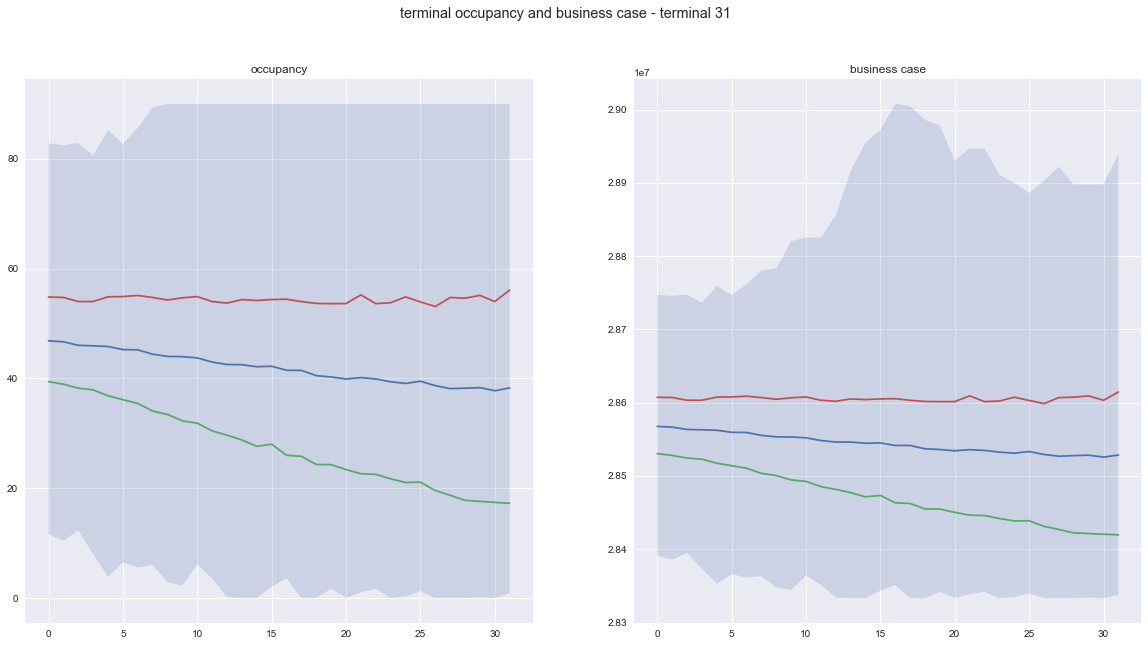

In [11]:
data1 = new_outcomes['terminal_occupancy_project31']
data2 = new_outcomes['business_case_terminal_project31']

data1_list = []
for i in range(len(data1)):
    data1_list.append(data1[i][8:])
data1_list = np.array(data1_list)

data2_list = []
for i in range(len(data2)):
    data2_list.append(data2[i][8:])
data2_list = np.array(data2_list)


plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('terminal occupancy and business case - terminal 31')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1_list, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1_list.shape[1]),np.min(data1_list, axis=0), np.max(data1_list, axis=0), alpha=0.2)
ax.plot(np.percentile(data1_list, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1_list, 75, axis=0), label='third quartile')
# plt.ylim([10000,100000])
plt.title('occupancy')
plt.legend

ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2_list, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2_list.shape[1]),np.min(data2_list, axis=0), np.max(data2_list, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2_list, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2_list, 75, axis=0), label='third quartile')
# plt.ylim([10000,100000])
plt.title('business case')
plt.legend
plt.show()

In [ ]:
data1 = new_outcomes['area_denied_infra_cap_current4']
data2 = new_outcomes['area_denied_infra_cap_project4']

plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('area denied cap')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
ax.plot(np.percentile(data1, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1, 75, axis=0), label='third quartile')
plt.ylim([10000,1000000])
plt.title('current')


ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2.shape[1]),np.min(data2, axis=0), np.max(data2, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2, 75, axis=0), label='third quartile')
plt.ylim([10000,1000000])
plt.title('project')

plt.show()

In [ ]:
data1 = new_outcomes['area_occupancy_current4']
data2 = new_outcomes['area_occupancy_project4']

plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('area 4 - occupancy')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
ax.plot(np.percentile(data1, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1, 75, axis=0), label='third quartile')
plt.ylim([0,100])
plt.title('current')


ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2.shape[1]),np.min(data2, axis=0), np.max(data2, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2, 75, axis=0), label='third quartile')
plt.ylim([0,100])
plt.title('project')

plt.show()

In [ ]:
data1 = new_outcomes['area_TP_current4']
data2 = new_outcomes['area_TP_project4']

plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('area 4 - throughput')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
ax.plot(np.percentile(data1, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1, 75, axis=0), label='third quartile')
plt.ylim([0,6000000])
plt.title('current')


ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2.shape[1]),np.min(data2, axis=0), np.max(data2, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2, 75, axis=0), label='third quartile')
plt.ylim([0,6000000])
plt.title('project')

plt.show()

In [ ]:
data1 = new_outcomes['total_TP_rdam_current']
data2 = new_outcomes['total_TP_rdam_project']

plt.close('all')
fig = plt.figure(figsize=(20,10))
fig.suptitle('Throughput Rotterdam - accepted')

ax = fig.add_subplot(121)
ax.plot(np.mean(data1, axis=0), label = 'mean')
ax.fill_between(np.arange(0, data1.shape[1]),np.min(data1, axis=0), np.max(data1, axis=0), alpha=0.2)
ax.plot(np.percentile(data1, 25, axis=0), label='first quartile')
ax.plot(np.percentile(data1, 75, axis=0), label='third quartile')
plt.ylim([0,5500000])
plt.title('current')


ax1 = fig.add_subplot(122)
ax1.plot(np.mean(data2, axis=0), label = 'mean')
ax1.fill_between(np.arange(0, data2.shape[1]),np.min(data2, axis=0), np.max(data2, axis=0), alpha=0.2)
ax1.plot(np.percentile(data2, 25, axis=0), label='first quartile')
ax1.plot(np.percentile(data2, 75, axis=0), label='third quartile')
plt.ylim([0,5500000])
plt.title('project')

plt.show()